# Project: Linear Regression with Tensors
### Objective:
Use TensorFlow to build a simple **linear regression model** using only Tensors, Variables, and GradientTape

### Step 1: Import Libraries

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Eager execution is ON by default in TF 2.x,

but we can check just to be sure:
```
print("Eager execution enabled:", tf.executing_eagerly())
```

In [ ]:
print("Eager execution is enabled:", tf.executing_eagerly())

Eager execution is enabled: True


### Step 2: Create Synthetic Data

In [ ]:
# Step 2: Create Synthetic Data
# Income (in thousands per month), normalized between 0 and 1
income = tf.constant([0.2, 0.4, 0.6, 0.8, 1.0], dtype=tf.float32)

# House prices (in hundreds of thousands), linear relation with some noise
price = tf.constant([0.25, 0.45, 0.65, 0.75, 0.95], dtype=tf.float32)

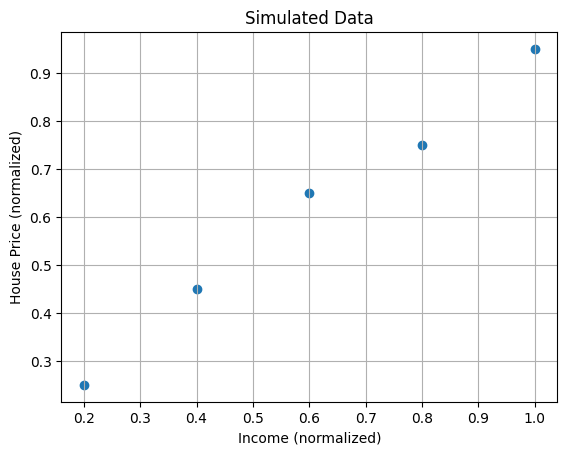

In [ ]:
# plot
plt.scatter(income, price)
plt.xlabel("Income (normalized)")
plt.ylabel("House Price (normalized)")
plt.title("Simulated Data")
plt.grid(True)
plt.show()

### Step 3: Eager Execution Training

In [ ]:
# Initialize variables
m_eager = tf.Variable(0.0)
b_eager = tf.Variable(0.0)

# Eager training loop
learning_rate = 0.1
epochs = 100

for i in range(epochs):
    with tf.GradientTape() as tape:
        pred = m_eager * income + b_eager
        loss = tf.reduce_mean((price - pred)**2)

    grads = tape.gradient(loss, [m_eager, b_eager])
    m_eager.assign_sub(learning_rate * grads[0])
    b_eager.assign_sub(learning_rate * grads[1])

    if i % 20 == 0:
        print(f"[Eager] Step {i}: Loss = {loss.numpy():.4f}")

[Eager] Step 0: Loss = 0.4305
[Eager] Step 20: Loss = 0.0166
[Eager] Step 40: Loss = 0.0106
[Eager] Step 60: Loss = 0.0069
[Eager] Step 80: Loss = 0.0046


### Step 4: Define Graph Training Function with `@tf.function`

In [ ]:
# Reset variables
m_graph = tf.Variable(0.0)
b_graph = tf.Variable(0.0)

@tf.function
def train_step(x, y, m, b):
    with tf.GradientTape() as tape:
        pred = m * x + b
        loss = tf.reduce_mean((y - pred) ** 2)
    grads = tape.gradient(loss, [m, b])
    m.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    return loss


### Step 5: Run Graph Execution Training

In [ ]:
for i in range(epochs):
    loss = train_step(income, price, m_graph, b_graph)
    if i % 20 == 0:
        print(f"[Graph] Step {i}: Loss = {loss.numpy():.4f}")


[Graph] Step 0: Loss = 0.4305
[Graph] Step 20: Loss = 0.0166
[Graph] Step 40: Loss = 0.0106
[Graph] Step 60: Loss = 0.0069
[Graph] Step 80: Loss = 0.0046


### STep 6: Plot Comparison

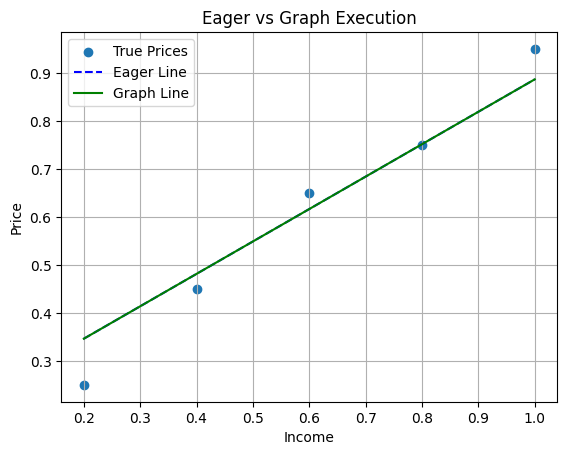

In [ ]:
plt.scatter(income, price, label="True Prices")
plt.plot(income, m_eager * income + b_eager, label="Eager Line", color="blue", linestyle="--")
plt.plot(income, m_graph * income + b_graph, label="Graph Line", color="green")
plt.xlabel("Income")
plt.ylabel("Price")
plt.title("Eager vs Graph Execution")
plt.legend()
plt.grid(True)
plt.show()
